In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main
from utilis_2D import params

In [2]:
total_sim_step = params['total_sim_step']
control_interval = params['control_interval']
burnin_step = params['burnin_step']
cool_down_step = params['cool_down_step']
burnin_control_step = int(burnin_step/control_interval) # calculate the control step that are within the burnin period
cool_down_control_step = int(cool_down_step/control_interval)

## Flow

In [3]:
# flow_all_random, speed_all_random, occupancy_all_random, flow_dt_random, speed_dt_random, occupancy_dt_random = data_loader_main(csv_dict='Sim_Results/Ramp_Random')
flow_all_open, speed_all_open, occupancy_all_open, flow_dt_open, speed_dt_open, occupancy_dt_open = data_loader_main(csv_dict='Sim_Results/Ramp_Open')
flow_all_ALIANA, speed_all_ALIANA, occupancy_all_ALIANA, flow_dt_ALIANA, speed_dt_ALIANA, occupancy_dt_ALIANA = data_loader_main(csv_dict='Sim_Results/Ramp_ALIANA')
flow_all_PIALINEA, speed_all_PIALINEA, occupancy_all_PIALINEA, flow_dt_PIALINEA, speed_dt_PIALINEA, occupancy_dt_PIALINEA = data_loader_main(csv_dict='Sim_Results/Ramp_PIALINEA')
flow_all_FLALINEA, speed_all_FLALINEA, occupancy_all_FLALINEA, flow_dt_FLALINEA, speed_dt_FLALINEA, occupancy_dt_FLALINEA = data_loader_main(csv_dict='Sim_Results/Ramp_FLALINEA')
flow_all_MPC_R4, speed_all_MPC_R4, occupancy_all_MPC_R4, flow_dt_MPC_R4, speed_dt_MPC_R4, occupancy_dt_MPC_R4 = data_loader_main(csv_dict='Sim_Results/Ramp_MPCRefine4')
flow_all_DMD_MPC, speed_all_DMD_MPC, occupancy_all_DMD_MPC, flow_dt_DMD_MPC, speed_dt_DMD_MPC, occupancy_dt_DMD_MPC = data_loader_main(csv_dict='Sim_Results/Ramp_DMDMPC')

In [4]:
flow_all_open.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_all_open.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
flow_all_ALIANA.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_all_ALIANA.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

flow_all_PIALINEA.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_all_PIALINEA.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

flow_all_FLALINEA.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_all_FLALINEA.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

flow_all_MPC_R4.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_all_MPC_R4.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

flow_all_DMD_MPC.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_all_DMD_MPC.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

In [5]:
# control_input_Random = pd.read_csv('Results/Meter_Rate_Random.csv')
control_input_ALIANA = pd.read_csv('Results/Meter_Rate_ALIANA.csv')
control_input_PIALINEA = pd.read_csv('Results/Meter_Rate_PIALINEA.csv')
control_input_FLALINEA = pd.read_csv('Results/Meter_Rate_FLALINEA.csv')
control_input_MPC_R4 = pd.read_csv('Results/Meter_Rate_MPCRefine4.csv')
control_input_DMD_MPC = pd.read_csv('Results/Meter_Rate_DMDMPC.csv')

In [6]:
control_input_ALIANA.rename(columns={"H10E_onMeter_1": "CA-134E On-Ramp #1", "H10E_onMeter_2": "CA-134E On-Ramp #2", "H10E_onMeter_3": "CA-134E On-Ramp #3",
                                     "H15N_onMeter_2": "I-5N On-Ramp #2", "H25S_onMeter_1": "CA-2S On-Ramp #1", "H25S_onMeter_2": "CA-2S On-Ramp #2"}, inplace=True)

control_input_PIALINEA.rename(columns={"H10E_onMeter_1": "CA-134E On-Ramp #1", "H10E_onMeter_2": "CA-134E On-Ramp #2", "H10E_onMeter_3": "CA-134E On-Ramp #3",
                                     "H15N_onMeter_2": "I-5N On-Ramp #2", "H25S_onMeter_1": "CA-2S On-Ramp #1", "H25S_onMeter_2": "CA-2S On-Ramp #2"}, inplace=True)

control_input_FLALINEA.rename(columns={"H10E_onMeter_1": "CA-134E On-Ramp #1", "H10E_onMeter_2": "CA-134E On-Ramp #2", "H10E_onMeter_3": "CA-134E On-Ramp #3",
                                     "H15N_onMeter_2": "I-5N On-Ramp #2", "H25S_onMeter_1": "CA-2S On-Ramp #1", "H25S_onMeter_2": "CA-2S On-Ramp #2"}, inplace=True)

control_input_MPC_R4.rename(columns={"H10E_onMeter_1": "CA-134E On-Ramp #1", "H10E_onMeter_2": "CA-134E On-Ramp #2", "H10E_onMeter_3": "CA-134E On-Ramp #3",
                                     "H15N_onMeter_2": "I-5N On-Ramp #2", "H25S_onMeter_1": "CA-2S On-Ramp #1", "H25S_onMeter_2": "CA-2S On-Ramp #2"}, inplace=True)

control_input_DMD_MPC.rename(columns={"H10E_onMeter_1": "CA-134E On-Ramp #1", "H10E_onMeter_2": "CA-134E On-Ramp #2", "H10E_onMeter_3": "CA-134E On-Ramp #3",
                                     "H15N_onMeter_2": "I-5N On-Ramp #2", "H25S_onMeter_1": "CA-2S On-Ramp #1", "H25S_onMeter_2": "CA-2S On-Ramp #2"}, inplace=True)

In [7]:
flow_all_open, speed_all_open, occupancy_all_open = flow_all_open.iloc[burnin_control_step:-cool_down_control_step, :], speed_all_open.iloc[burnin_control_step:-cool_down_control_step, :], occupancy_all_open.iloc[burnin_control_step:-cool_down_control_step, :]
flow_all_ALIANA, speed_all_ALIANA, occupancy_all_ALIANA = flow_all_ALIANA.iloc[burnin_control_step:-cool_down_control_step, :], speed_all_ALIANA.iloc[burnin_control_step:-cool_down_control_step, :], occupancy_all_ALIANA.iloc[burnin_control_step:-cool_down_control_step, :]

flow_all_PIALINEA, speed_all_PIALINEA, occupancy_all_PIALINEA = flow_all_PIALINEA.iloc[burnin_control_step:-cool_down_control_step, :], speed_all_PIALINEA.iloc[burnin_control_step:-cool_down_control_step, :], occupancy_all_PIALINEA.iloc[burnin_control_step:-cool_down_control_step, :]

flow_all_FLALINEA, speed_all_FLALINEA, occupancy_all_FLALINEA = flow_all_FLALINEA.iloc[burnin_control_step:-cool_down_control_step, :], speed_all_FLALINEA.iloc[burnin_control_step:-cool_down_control_step, :], occupancy_all_FLALINEA.iloc[burnin_control_step:-cool_down_control_step, :]

flow_all_MPC_R4, speed_all_MPC_R4, occupancy_all_MPC_R4 = flow_all_MPC_R4.iloc[burnin_control_step:-cool_down_control_step, :], speed_all_MPC_R4.iloc[burnin_control_step:-cool_down_control_step, :], occupancy_all_MPC_R4.iloc[burnin_control_step:-cool_down_control_step, :]

flow_all_DMD_MPC, speed_all_DMD_MPC, occupancy_all_DMD_MPC = flow_all_DMD_MPC.iloc[burnin_control_step:-cool_down_control_step, :], speed_all_DMD_MPC.iloc[burnin_control_step:-cool_down_control_step, :], occupancy_all_DMD_MPC.iloc[burnin_control_step:-cool_down_control_step, :]

control_input_ALIANA = control_input_ALIANA.iloc[burnin_control_step:-cool_down_control_step, :]
control_input_PIALINEA = control_input_PIALINEA.iloc[burnin_control_step:-cool_down_control_step, :]
control_input_FLALINEA = control_input_FLALINEA.iloc[burnin_control_step:-cool_down_control_step, :]
control_input_MPC_R4 = control_input_MPC_R4.iloc[burnin_control_step:-cool_down_control_step, :]
control_input_DMD_MPC = control_input_DMD_MPC.iloc[burnin_control_step:-cool_down_control_step, :]

In [8]:
flow_all_open, speed_all_open, occupancy_all_open = flow_all_open.reset_index(drop=True), speed_all_open.reset_index(drop=True), occupancy_all_open.reset_index(drop=True)
flow_all_ALIANA, speed_all_ALIANA, occupancy_all_ALIANA = flow_all_ALIANA.reset_index(drop=True), speed_all_ALIANA.reset_index(drop=True),occupancy_all_ALIANA.reset_index(drop=True)
flow_all_PIALINEA, speed_all_PIALINEA, occupancy_all_PIALINEA = flow_all_PIALINEA.reset_index(drop=True), speed_all_PIALINEA.reset_index(drop=True),occupancy_all_PIALINEA.reset_index(drop=True)
flow_all_FLALINEA, speed_all_FLALINEA, occupancy_all_FLALINEA = flow_all_FLALINEA.reset_index(drop=True), speed_all_FLALINEA.reset_index(drop=True),occupancy_all_FLALINEA.reset_index(drop=True)

flow_all_MPC_R4, speed_all_MPC_R4, occupancy_all_MPC_R4 = flow_all_MPC_R4.reset_index(drop=True),speed_all_MPC_R4.reset_index(drop=True),occupancy_all_MPC_R4.reset_index(drop=True)
flow_all_DMD_MPC, speed_all_DMD_MPC, occupancy_all_DMD_MPC = flow_all_DMD_MPC.reset_index(drop=True),speed_all_DMD_MPC.reset_index(drop=True),occupancy_all_DMD_MPC.reset_index(drop=True)

In [9]:
control_input_ALIANA = control_input_ALIANA.reset_index(drop=True)
control_input_PIALINEA = control_input_PIALINEA.reset_index(drop=True)
control_input_FLALINEA = control_input_FLALINEA.reset_index(drop=True)
control_input_MPC_R4 = control_input_MPC_R4.reset_index(drop=True)
control_input_DMD_MPC = control_input_DMD_MPC.reset_index(drop=True)

In [10]:
ramp_summary = pd.DataFrame([control_input_ALIANA.mean(axis=0), control_input_PIALINEA.mean(axis=0), control_input_FLALINEA.mean(axis=0),
                             control_input_DMD_MPC.mean(axis=0), control_input_MPC_R4.mean(axis=0)], index=['ALIANA', 'PI-ALINEA', 'FL-ALINEA', 'DMD-MPC','Proposed Model'])

In [11]:
ramp_summary = ramp_summary.transpose()

In [12]:
ramp_summary.to_csv('Results/Ramp_summary.csv')

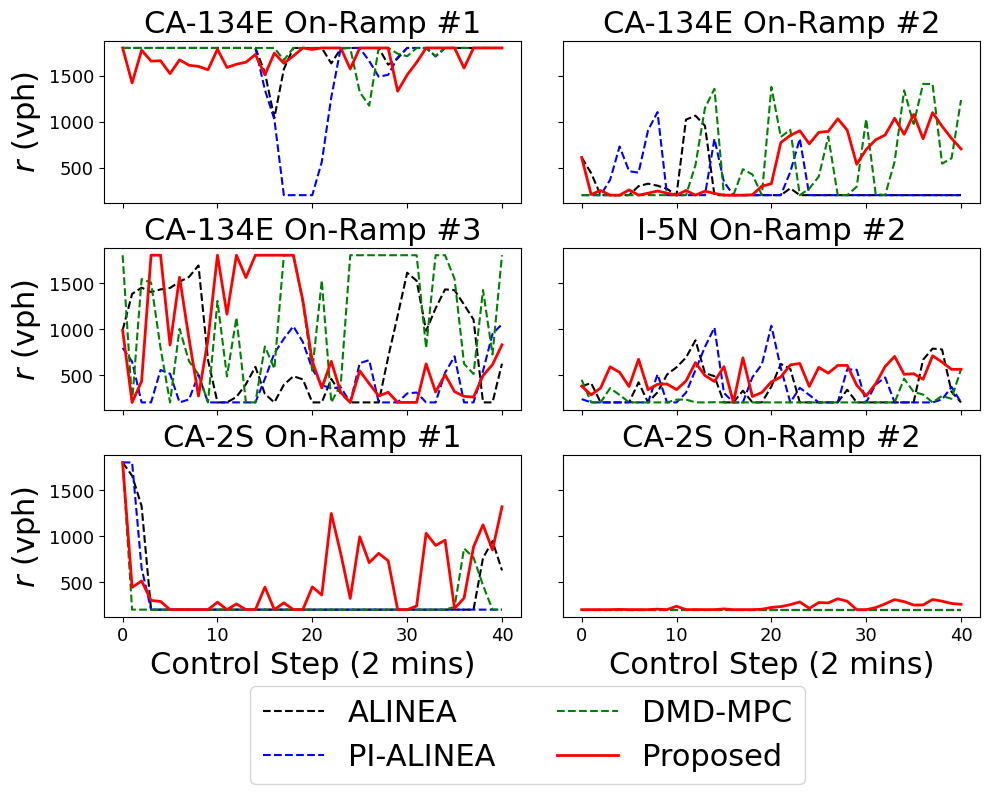

In [13]:
plt.show()
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 7), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(3):
    for col in range(2):
        index = row*2 + col
        # axs[row, col].plot(control_input_Random.iloc[:, index], "--", label='Random', linewidth=1)
        axs[row, col].plot(control_input_ALIANA.iloc[:, index], "--", label='ALINEA', linewidth=1.5, color = 'black')
        axs[row, col].plot(control_input_PIALINEA.iloc[:, index], "--", label='PI-ALINEA', linewidth=1.5, color = 'blue')
        axs[row, col].plot(control_input_DMD_MPC.iloc[:, index], "--", label='DMD-MPC', linewidth=1.5, color = 'green')
        # axs[row, col].plot(control_input_FLALINEA.iloc[:, index], "--", label='FL-ALINEA', linewidth=1.5, color = 'green')
        # axs[row, col].plot(control_input_MPC.iloc[:, index], "--", label='SINDy-MPC',linewidth=1.5)
        # axs[row, col].plot(control_input_MPC_R.iloc[:, index], "--", label='SINDy-MPC-R',linewidth=1.5)
        # axs[row, col].plot(control_input_MPC_R2.iloc[:, index], "--", label='SINDy-MPC-R2',linewidth=1.5)
        axs[row, col].plot(control_input_MPC_R4.iloc[:, index], "-", label='Proposed',linewidth=2, color = 'red')
        axs[row, col].set_title(control_input_ALIANA.columns[index], fontsize=22)
        # axs[row, col].legend(loc='lower right', fontsize=8, ncol=1)
        axs[row, col].tick_params(axis='both', labelsize=13)

for col in range(2):
    axs[2, col].set_xlabel('Control Step (2 mins)', fontsize=22)

for row in range(3):
    axs[row, 0].set_ylabel('$r$ (vph)', fontsize=22)
    
handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.24,-0.15), fontsize=22, ncol = 2)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.28, wspace=0.1)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Ramp_Rate.png', dpi=300, bbox_inches='tight')

In [14]:
flow_summary = pd.DataFrame(flow_all_open.mean(axis=0), columns=['No_Control'])
flow_summary['ALIANA'] = flow_all_ALIANA.mean(axis=0)
flow_summary['PI-ALINEA'] = flow_all_PIALINEA.mean(axis=0)
flow_summary['FL-ALINEA'] = flow_all_FLALINEA.mean(axis=0)
flow_summary['DMD-MPC'] = flow_all_DMD_MPC.mean(axis=0)
flow_summary['Proposed'] = flow_all_MPC_R4.mean(axis=0)

In [15]:
occupancy_all_open_dev = abs(occupancy_all_open - 15)
occupancy_all_ALIANA_dev = abs(occupancy_all_ALIANA - 15)
occupancy_all_PIALINEA_dev = abs(occupancy_all_PIALINEA - 15)
occupancy_all_FLALINEA_dev = abs(occupancy_all_FLALINEA - 15)
occupancy_all_DMD_MPC_dev = abs(occupancy_all_DMD_MPC - 15)
occupancy_all_MPC_R4_dev = abs(occupancy_all_MPC_R4 - 15)

In [16]:
occupancy_summary = pd.DataFrame(occupancy_all_open_dev.mean(axis=0), columns=['No_Control'])
occupancy_summary['ALIANA'] = occupancy_all_ALIANA_dev.mean(axis=0)
occupancy_summary['PI-ALINEA'] = occupancy_all_PIALINEA_dev.mean(axis=0)
occupancy_summary['FL-ALINEA'] = occupancy_all_FLALINEA_dev.mean(axis=0)
occupancy_summary['DMD-MPC'] = occupancy_all_DMD_MPC_dev.mean(axis=0)
occupancy_summary['Proposed'] = occupancy_all_MPC_R4_dev.mean(axis=0)

In [17]:
flow_summary.loc['Average'] = flow_summary.mean()
flow_summary = flow_summary.round(0)

occupancy_summary.loc['Average'] = occupancy_summary.mean()
occupancy_summary = occupancy_summary.round(2)

In [18]:
flow_summary.to_csv('Results/Flow_summary.csv')
occupancy_summary.to_csv('Results/Occupancy_summary.csv')

In [19]:
occupancy_all_open_mean = occupancy_all_open.mean(axis=1)
occupancy_all_ALIANA_mean = occupancy_all_ALIANA.mean(axis=1)
occupancy_all_PIALINEA_mean = occupancy_all_PIALINEA.mean(axis=1)
occupancy_all_FLALINEA_mean = occupancy_all_FLALINEA.mean(axis=1)
occupancy_all_DMD_MPC_mean = occupancy_all_DMD_MPC.mean(axis=1)

flow_all_open_mean = flow_all_open.mean(axis=1)
flow_all_ALIANA_mean = flow_all_ALIANA.mean(axis=1)
flow_all_PIALINEA_mean = flow_all_PIALINEA.mean(axis=1)
flow_all_FLALINEA_mean = flow_all_FLALINEA.mean(axis=1)
flow_all_DMD_MPC_mean = flow_all_DMD_MPC.mean(axis=1)

speed_all_open_mean = speed_all_open.mean(axis=1)
speed_all_ALIANA_mean = speed_all_ALIANA.mean(axis=1)
speed_all_PIALINEA_mean = speed_all_PIALINEA.mean(axis=1)
speed_all_FLALINEA_mean = speed_all_FLALINEA.mean(axis=1)
speed_all_DMD_MPC_mean = speed_all_DMD_MPC.mean(axis=1)

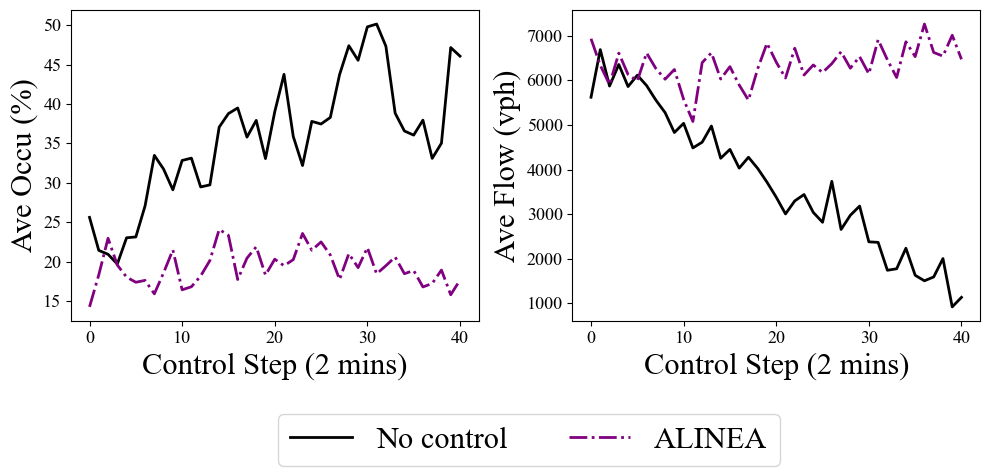

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)
# Plot each column in a separate subplot
axs[0].plot(occupancy_all_open_mean, linestyle='-', label='No control', linewidth=2, color='black')
# axs[0].plot(occupancy_all_ALIANA_mean, linestyle='--', label='ALINEA', linewidth=2, color='blue')
axs[0].plot(occupancy_all_ALIANA_mean, linestyle='-.', label='ALINEA', linewidth=2, color='purple')
# axs[0].plot(occupancy_all_DMD_MPC_mean, linestyle='-.', label='DMD-MPC', linewidth=2, color='purple')

axs[1].plot(flow_all_open_mean, linestyle='-', label='No control', linewidth=2, color='black')
# axs[1].plot(flow_all_ALIANA_mean, linestyle='--', label='ALINEA', linewidth=2, color='blue')
axs[1].plot(flow_all_ALIANA_mean, linestyle='-.', label='ALINEA', linewidth=2, color='purple')
# axs[1].plot(flow_all_DMD_MPC_mean, linestyle='-.', label='DMD-MPC', linewidth=2, color='purple')

# axs[2].plot(2.23694 * speed_all_open_mean, linestyle='-', label='No control', linewidth=2, color='black')
# axs[2].plot(2.23694 * speed_all_ALIANA_mean, linestyle='--', label='ALINEA', linewidth=2, color='blue')
# axs[2].plot(2.23694 * speed_all_PIALINEA_mean, linestyle=':', label='PI-ALINEA', linewidth=2, color='green')
# axs[2].plot(2.23694 * speed_all_FLALINEA_mean, linestyle='-.', label='FL-ALINEA', linewidth=2, color='purple')

axs[0].set_ylabel('Ave Occu (%)', fontsize=22)
axs[1].set_ylabel('Ave Flow (vph)', fontsize=22)
# axs[2].set_ylabel('Ave Speed (mph)', fontsize=20)

axs[0].set_xlabel('Control Step (2 mins)', fontsize=22)
axs[1].set_xlabel('Control Step (2 mins)', fontsize=22)
# axs[2].set_xlabel('Control Step (2 mins)', fontsize=20)

axs[0].tick_params(axis='both', labelsize=13)
axs[1].tick_params(axis='both', labelsize=13)
# axs[2].tick_params(axis='both', labelsize=13)
    
handles, labels = axs[0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, bbox_to_anchor=(0.8,-0.01), fontsize=22, ncol = 2)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Control_Bench.png', dpi=300, bbox_inches='tight')

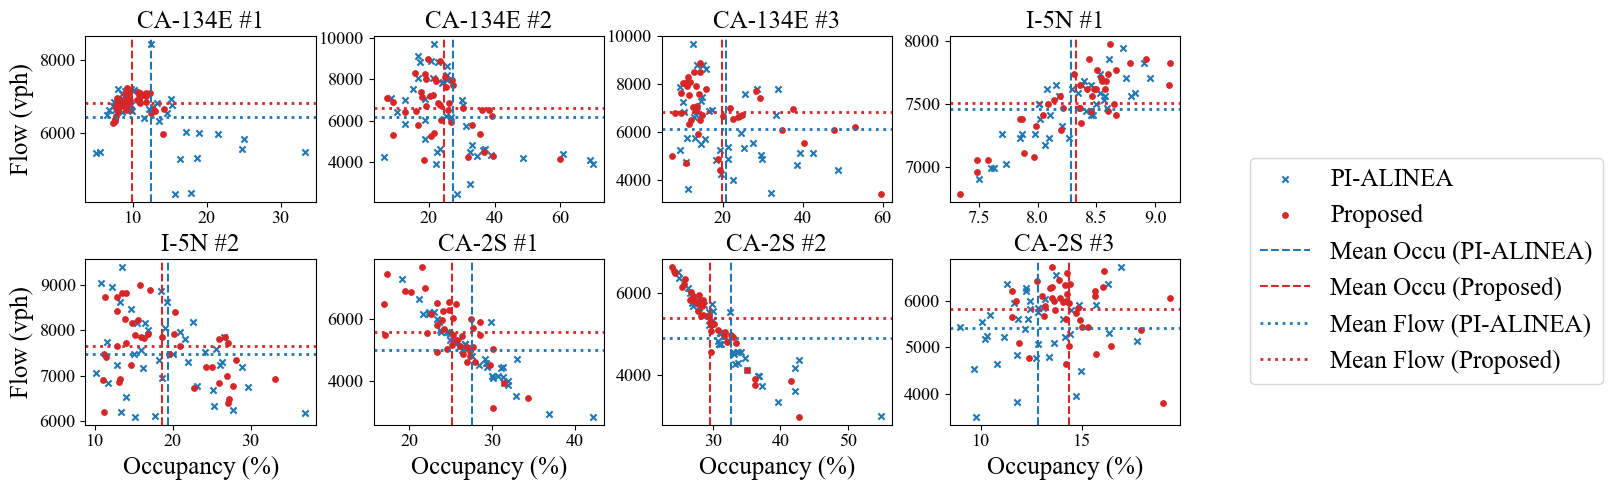

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 5), sharex=False, sharey=False)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        # axs[row, col].scatter(occupancy_all_open.iloc[:,index], flow_all_open.iloc[:,index], s=3, label = "No Control")
        # axs[row, col].scatter(occupancy_all_ALIANA.iloc[:,index], flow_all_ALIANA.iloc[:,index], s=20,  marker='x', label = "ALINEA", color='#1f77b4')
        axs[row, col].scatter(occupancy_all_PIALINEA.iloc[:,index], flow_all_PIALINEA.iloc[:,index], s=20,  marker='x', label = "PI-ALINEA", color='#1f77b4')
        axs[row, col].scatter(occupancy_all_MPC_R4.iloc[:,index], flow_all_MPC_R4.iloc[:,index], s=15,  marker='o', label = "Proposed", color='#d62728')
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=18)
        # axs[row, col].set_xlim(5,40)
        
        # Calculate the means
        mean_PIALINEA = np.mean(occupancy_all_PIALINEA.iloc[:, index])
        mean_MPC_R4 = np.mean(occupancy_all_MPC_R4.iloc[:, index])
        
        mean_PIALINEA_flow = np.mean(flow_all_PIALINEA.iloc[:, index])
        mean_MPC_R4_flow = np.mean(flow_all_MPC_R4.iloc[:, index])
        
        # Add vertical lines for the means
        axs[row, col].axvline(mean_PIALINEA, color='#1f77b4', linestyle='--', linewidth=1.5, label='Mean Occu (PI-ALINEA)' if row == 0 and col == 0 else "")
        axs[row, col].axvline(mean_MPC_R4, color='#d62728', linestyle='--', linewidth=1.5, label='Mean Occu (Proposed)' if row == 0 and col == 0 else "")
        
        axs[row, col].axhline(mean_PIALINEA_flow, color='#1f77b4', linestyle=':', linewidth=2, label='Mean Flow (PI-ALINEA)' if row == 0 and col == 0 else "")
        axs[row, col].axhline(mean_MPC_R4_flow, color='#d62728', linestyle=':', linewidth=2, label='Mean Flow (Proposed)' if row == 0 and col == 0 else "")
        # axs[row, col].axvline(15, color='red', linestyle='--', linewidth=1, label='Mean Proposed' if row == 0 and col == 0 else "")
        axs[row, col].tick_params(axis='both', labelsize=13)
        

for col in range(4):
    axs[1,col].set_xlabel('Occupancy (%)', fontsize = 18)

for row in range(2):
    axs[row,0].set_ylabel('Flow (vph)', fontsize = 18)
# Show the figure

handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, bbox_to_anchor=(1.35,0.7), fontsize=18, ncol = 1)
plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.25)
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('Figures/Scatter_FD.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
occupancy_all_PIALINEA_select = occupancy_all_PIALINEA[['I-5N #1', 'CA-2S #1', 'CA-2S #2', 'CA-2S #3']]
flow_all_PIALINEA_select = flow_all_PIALINEA[['I-5N #1', 'CA-2S #1', 'CA-2S #2', 'CA-2S #3']]
occupancy_all_MPC_R4_select = occupancy_all_MPC_R4[['I-5N #1', 'CA-2S #1', 'CA-2S #2', 'CA-2S #3']]
flow_all_MPC_R4_select = flow_all_MPC_R4[['I-5N #1', 'CA-2S #1', 'CA-2S #2', 'CA-2S #3']]

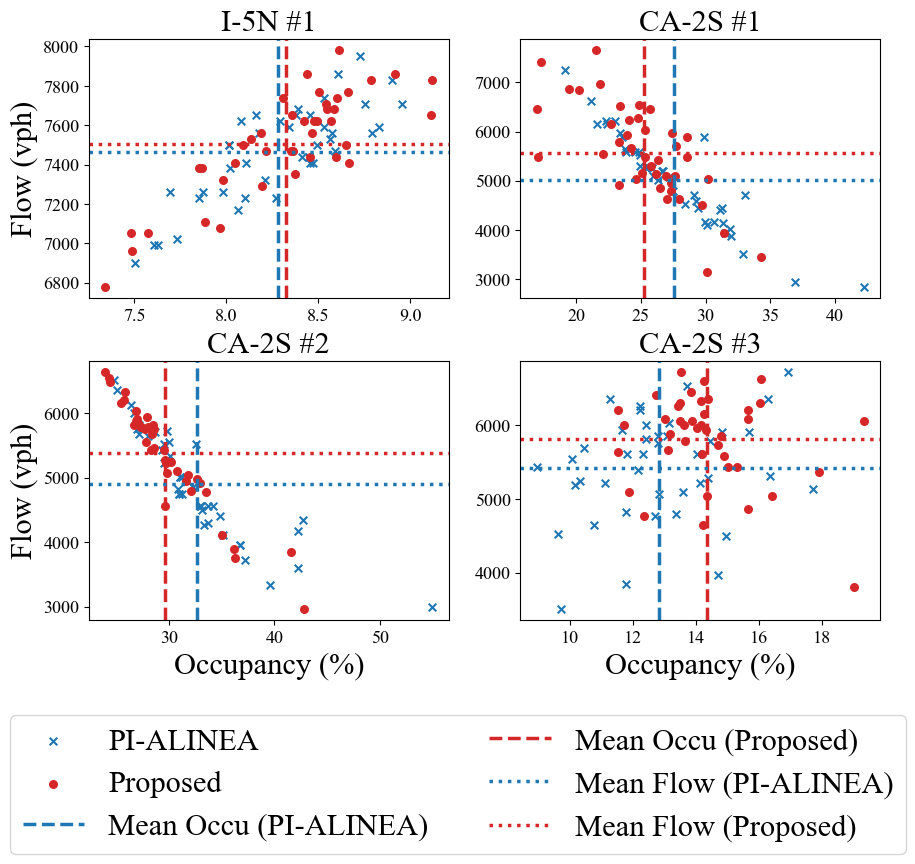

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 7), sharex=False, sharey=False)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(2):
        index = row*2 + col
        # axs[row, col].scatter(occupancy_all_open.iloc[:,index], flow_all_open.iloc[:,index], s=3, label = "No Control")
        # axs[row, col].scatter(occupancy_all_ALIANA.iloc[:,index], flow_all_ALIANA.iloc[:,index], s=20,  marker='x', label = "ALINEA", color='#1f77b4')
        axs[row, col].scatter(occupancy_all_PIALINEA_select.iloc[:,index], flow_all_PIALINEA_select.iloc[:,index], s=30,  marker='x', label = "PI-ALINEA", color='#1f77b4')
        axs[row, col].scatter(occupancy_all_MPC_R4_select.iloc[:,index], flow_all_MPC_R4_select.iloc[:,index], s=30,  marker='o', label = "Proposed", color='#d62728')
        axs[row, col].set_title(flow_all_PIALINEA_select.columns[index], fontsize=22)
        # axs[row, col].set_xlim(5,40)
        
        # Calculate the means
        mean_PIALINEA = np.mean(occupancy_all_PIALINEA_select.iloc[:, index])
        mean_MPC_R4 = np.mean(occupancy_all_MPC_R4_select.iloc[:, index])
        
        mean_PIALINEA_flow = np.mean(flow_all_PIALINEA_select.iloc[:, index])
        mean_MPC_R4_flow = np.mean(flow_all_MPC_R4_select.iloc[:, index])
        
        # Add vertical lines for the means
        axs[row, col].axvline(mean_PIALINEA, color='#1f77b4', linestyle='--', linewidth=2.5, label='Mean Occu (PI-ALINEA)' if row == 0 and col == 0 else "")
        axs[row, col].axvline(mean_MPC_R4, color='#d62728', linestyle='--', linewidth=2.5, label='Mean Occu (Proposed)' if row == 0 and col == 0 else "")
        
        axs[row, col].axhline(mean_PIALINEA_flow, color='#1f77b4', linestyle=':', linewidth=2.5, label='Mean Flow (PI-ALINEA)' if row == 0 and col == 0 else "")
        axs[row, col].axhline(mean_MPC_R4_flow, color='#d62728', linestyle=':', linewidth=2.5, label='Mean Flow (Proposed)' if row == 0 and col == 0 else "")
        # axs[row, col].axvline(15, color='red', linestyle='--', linewidth=1, label='Mean Proposed' if row == 0 and col == 0 else "")
        axs[row, col].tick_params(axis='both', labelsize=13)
        

for col in range(2):
    axs[1,col].set_xlabel('Occupancy (%)', fontsize = 22)

for row in range(2):
    axs[row,0].set_ylabel('Flow (vph)', fontsize = 22)
# Show the figure

handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0,-0.25), fontsize=22, ncol = 2)
plt.tight_layout()
plt.subplots_adjust(hspace=0.24, wspace=0.2)
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig('Figures/Scatter_FD_select.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# # moving average
window_size = 10
flow_all_open = flow_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_ALIANA = flow_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_PIALINEA = flow_all_PIALINEA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_FLALINEA = flow_all_FLALINEA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_MPC_R4 = flow_all_MPC_R4.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
flow_all_DMD_MPC = flow_all_DMD_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

occupancy_all_open = occupancy_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_ALIANA = occupancy_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_PIALINEA = occupancy_all_PIALINEA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_FLALINEA = occupancy_all_FLALINEA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_MPC_R4 = occupancy_all_MPC_R4.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
occupancy_all_DMD_MPC = occupancy_all_DMD_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()

speed_all_open = speed_all_open.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_ALIANA = speed_all_ALIANA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_PIALINEA = speed_all_PIALINEA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_FLALINEA = speed_all_FLALINEA.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_MPC_R4 = speed_all_MPC_R4.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()
speed_all_DMD_MPC = speed_all_DMD_MPC.apply(lambda x: x.rolling(window=window_size).mean() if x.dtype.kind in 'biufc' else x).dropna()


In [25]:
flow_all_ALIANA = flow_all_ALIANA.reset_index(drop=True)
flow_all_PIALINEA = flow_all_PIALINEA.reset_index(drop=True)
flow_all_FLALINEA = flow_all_FLALINEA.reset_index(drop=True)
flow_all_MPC_R4 = flow_all_MPC_R4.reset_index(drop=True)
flow_all_DMD_MPC = flow_all_DMD_MPC.reset_index(drop=True)

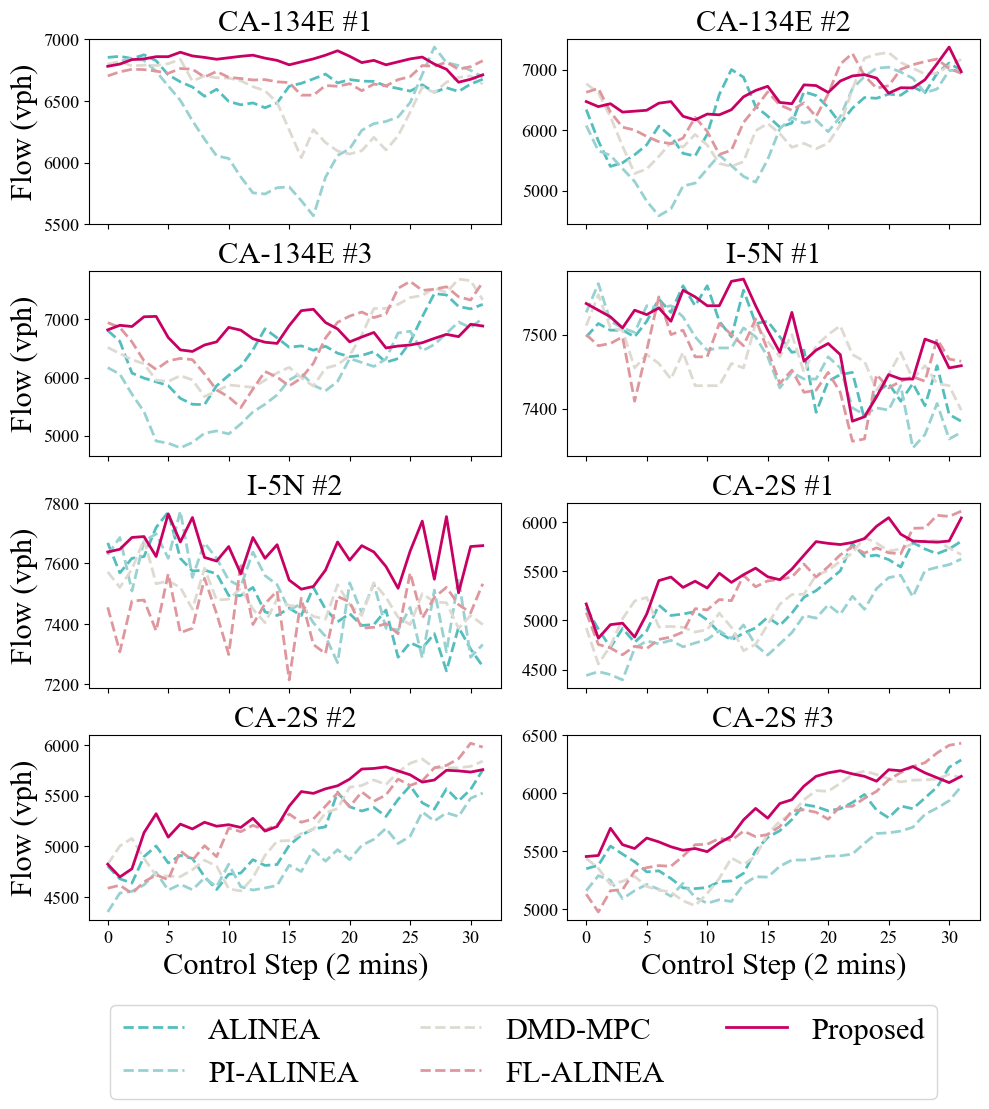

In [26]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=False)
#["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064"]
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        # no_control = axs[row, col].plot(flow_all_open.iloc[:, index], "--", marker='o', ms = 1, label = 'No Contorl',linewidth=1, color = 'black')
        ALINEA = axs[row, col].plot(flow_all_ALIANA.iloc[:, index], "--", label = 'ALINEA',linewidth=2, color = "#54bebe")
        PIALINEA = axs[row, col].plot(flow_all_PIALINEA.iloc[:, index], "--", label = 'PI-ALINEA',linewidth=2, color = "#98d1d1")
        DMDMPC = axs[row, col].plot(flow_all_DMD_MPC.iloc[:, index], "--", label = 'DMD-MPC',linewidth=2, color = "#dedad2")
        FLALINEA = axs[row, col].plot(flow_all_FLALINEA.iloc[:, index], "--", label = 'FL-ALINEA',linewidth=2, color = "#df979e")
        axs[row, col].plot(flow_all_MPC_R4.iloc[:, index], "-", label = 'Proposed',linewidth=2, color = "#c80064")
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=22)
        axs[row, col].tick_params(axis='both', labelsize=13)

for col in range(2):
    axs[3,col].set_xlabel('Control Step (2 mins)', fontsize = 22)

for row in range(4):
    axs[row,0].set_ylabel('Flow (vph)', fontsize = 22)
# Show the figure

handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.1,-0.12), fontsize=22, ncol = 3)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.16)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Flow_Plot.png', dpi=300, bbox_inches='tight')

In [27]:
occupancy_all_ALIANA = occupancy_all_ALIANA.reset_index(drop=True)
occupancy_all_PIALINEA = occupancy_all_PIALINEA.reset_index(drop=True)
occupancy_all_FLALINEA = occupancy_all_FLALINEA.reset_index(drop=True)
occupancy_all_MPC_R4 = occupancy_all_MPC_R4.reset_index(drop=True)
occupancy_all_DMD_MPC = occupancy_all_DMD_MPC.reset_index(drop=True)

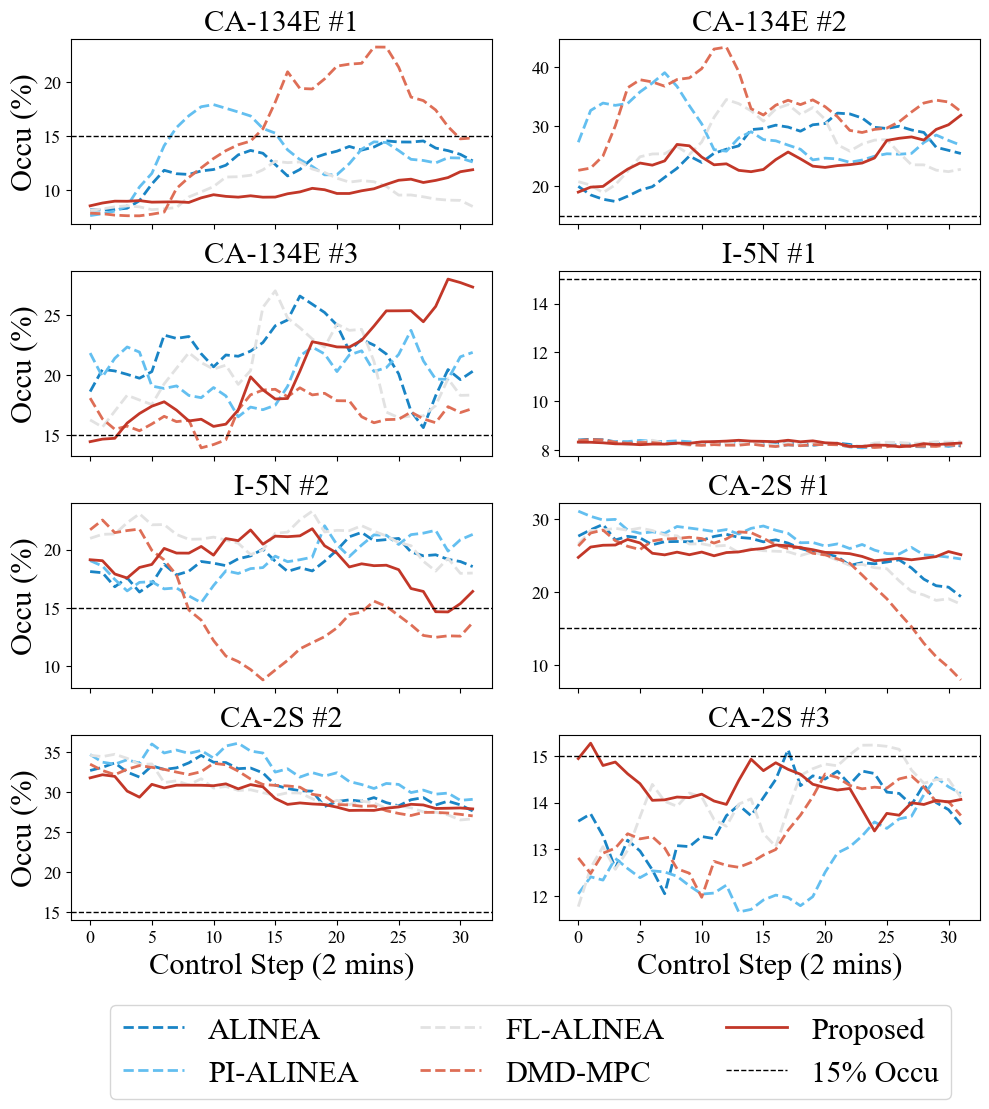

In [28]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=False)
# ["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        ALINEA = axs[row, col].plot(occupancy_all_ALIANA.iloc[:, index], "--", label = 'ALINEA',linewidth=2, color = "#1984c5")
        PIALINEA = axs[row, col].plot(occupancy_all_PIALINEA.iloc[:, index], "--", label = 'PI-ALINEA',linewidth=2, color = "#63bff0")
        FLALINEA = axs[row, col].plot(occupancy_all_FLALINEA.iloc[:, index], "--", label = 'FL-ALINEA',linewidth=2, color = "#e2e2e2")
        DMDMPC = axs[row, col].plot(occupancy_all_DMD_MPC.iloc[:, index], "--", label = 'DMD-MPC',linewidth=2, color = "#de6e56")
        axs[row, col].plot(occupancy_all_MPC_R4.iloc[:, index], "-", label = 'Proposed',linewidth=2, color = "#c23728")
        axs[row, col].axhline(y=15, color='black', linestyle='--', linewidth=1,label='15% Occu')  # Adding horizontal dashed line
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=22)
        axs[row, col].tick_params(axis='both', labelsize=13)

for col in range(2):
    axs[3,col].set_xlabel('Control Step (2 mins)', fontsize = 22)

for row in range(4):
    axs[row,0].set_ylabel('Occu (%)', fontsize = 22)
# Show the figure

handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.1,-0.12), fontsize=22, ncol = 3)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.16)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Occu_Plot.png', dpi=300, bbox_inches='tight')

In [29]:
flow_all_open_sum = flow_all_open.mean(axis=1)
flow_all_ALIANA_sum = flow_all_ALIANA.mean(axis=1)
flow_all_PIALINEA_sum = flow_all_PIALINEA.mean(axis=1)
flow_all_FLALINEA_sum = flow_all_FLALINEA.mean(axis=1)
flow_all_MPC_R4_sum = flow_all_MPC_R4.mean(axis=1)

In [30]:
occupancy_all_open_sum = occupancy_all_open.mean(axis=1)
occupancy_all_ALIANA_sum = occupancy_all_ALIANA.mean(axis=1)
occupancy_all_PIALINEA_sum = occupancy_all_PIALINEA.mean(axis=1)
occupancy_all_FLALINEA_sum = occupancy_all_FLALINEA.mean(axis=1)
occupancy_all_MPC_R4_sum = occupancy_all_MPC_R4.mean(axis=1)

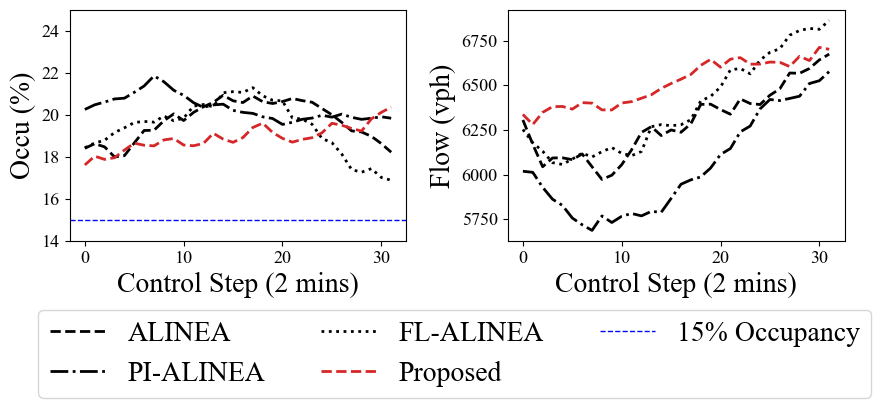

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharex=False, sharey=False)

axs[0].plot(occupancy_all_ALIANA_sum, linestyle='--', label='ALINEA', linewidth=2, color='black')
axs[0].plot(occupancy_all_PIALINEA_sum, linestyle='-.', label='PI-ALINEA', linewidth=2, color='black')
axs[0].plot(occupancy_all_FLALINEA_sum, linestyle=':', label='FL-ALINEA', linewidth=2, color='black')
axs[0].plot(occupancy_all_MPC_R4_sum, linestyle='--', label='Proposed', linewidth=2, color='#d62728')
axs[0].axhline(y=15, color='blue', linestyle='--', linewidth=1,label='15% Occupancy')  # Adding horizontal dashed line
axs[0].set_ylim(14,25)
axs[0].tick_params(axis='both', labelsize=13)

axs[0].set_xlabel('Control Step (2 mins)', fontsize = 20)
axs[0].set_ylabel('Occu (%)', fontsize = 20)
# plt.legend(fontsize=16)
axs[0].grid(False)

axs[1].plot(flow_all_ALIANA_sum, linestyle='--', label='ALINEA', linewidth=2, color='black')
axs[1].plot(flow_all_PIALINEA_sum, linestyle='-.', label='PI-ALINEA', linewidth=2, color='black')
axs[1].plot(flow_all_FLALINEA_sum, linestyle=':', label='FL-ALINEA', linewidth=2, color='black')
axs[1].plot(flow_all_MPC_R4_sum, linestyle='--', label='Proposed', linewidth=2, color='#d62728')
axs[1].tick_params(axis='both', labelsize=13)

axs[1].set_xlabel('Control Step (2 mins)', fontsize = 20)
axs[1].set_ylabel('Flow (vph)', fontsize = 20)
# plt.legend(fontsize=16)
axs[1].grid(False)

plt.subplots_adjust(wspace=0.3)
handles, labels = axs[0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.08,-0.46), fontsize=20, ncol = 3)
plt.savefig('Figures/ave_meas_plot.png', dpi=300,bbox_inches='tight')
plt.show()